<a href="https://colab.research.google.com/github/kkimyunjoo/24-2-ESAA/blob/main/1115_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **파이썬 딥러닝 텐서플로 Ch4.1~3**

142p~181p

## **Part 04. 합성곱 신경망(CNN)**



### **01. 합성곱 신경망**
- 합성곱 신경망(CNN: Convolutional Neural Network) : 데이터가 가진 특징들의 패턴을 학습하는 알고리즘
  - 이미지 분류, 객체 탐지, 스타일 전이

1-1. 이미지 표현
-  0~255 사이의 숫자로 각 픽셀의 화소값 나타내는 방식
  - 이미지의 강도, 숫자가 더 클수록 더 강한 특성을 나타냄
  - 숫자 0: 완전히 검은색
  - 숫자 1: 희색
- 컬러 이미지: R,G,B 채널로 구성된 3장의 이미지를 겹쳐서 표현

1-2. 합성곱(Convolution)
- 입력 이미지에 대하여 일반적으로 정방형 크기를 가지는 커널을 사용하여, 입력 이미지에 대한 특성을 추출하는 방법
  - 특성맵: 합성곱 연산을 통해서 추출된 이미지

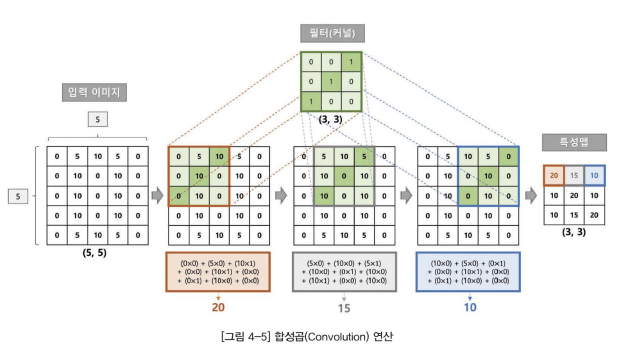

- 입력 이미지의 일부분에 커널이 겹치도록 투영해 합성곱 연산을 수행함.
- 합성곱 연산은 element-wise 곱셈 연산을 수행 후 모두 더한 값 -> 스칼라 값
- 커널 사이즈가 3x3 인 경우 총 9개의 가중치를 가지며 오차 역전파 시 커널의 가중치를 업데이트 -> 커널의 공유 가중치로 훨씬 연산량이 적음.

1-3. 채널
- 채널: 입력 이미지를 구성하는 2차원 배열의 개수
  - 흑백 이미지: 단일 채널
  - 컬러 이미지: 3개의 채널 -> 가로 세로 5픽셀의 컬러이미지의 shape: (5,5,3)
- 입력 이미지의 채널 개수 만큼 커널이 생성되고, 각 채널마다 하나씩 커널을 적용하여 합성곱 연산을 수행 -> element-wise 덧셈 연산으로 모두 더해주면 최종 특성맵 생성됨.

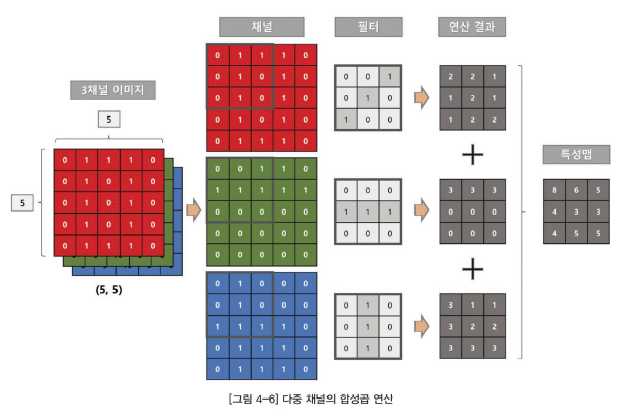




1-4. 스트라이트
- 커널은 좌측 상단으로부터 입력 이미지를 기준으로 우측으로 이동하면서 합성곱 연산을 계속 수행하고 특성맵에 결과를 채워나감. -> 이때 이동하는 간격을 스트라이트로 정의(주로 1또는 2)

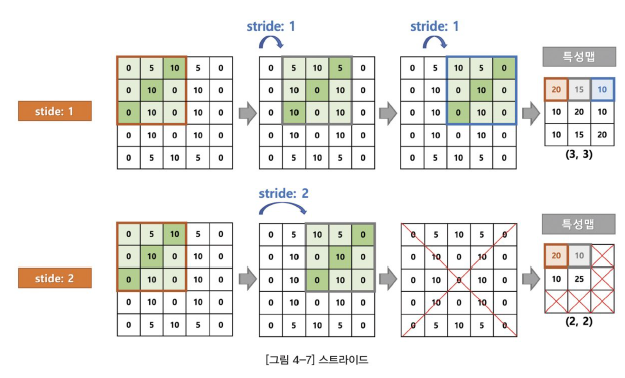

1-5. 패딩
- 추출된 특성맵의 크기가 입력 이미지 대비 줄어들지 않도록 패딩(padding) 설정
- 일반적으로 zero-papdding 사용: 입력 이미지의 가장 자라에 0으로 채워진 패딩 값으로 채운 후 추출 -> 특성맵 크기가 줄어들지 않음.
  - 케라스의 Conv2D 레이어에서 padding='same'로 설정하면 zero-padding 적용.
  - 기본값: padding='valid'


1-6. 특성맵 사이즈
-
1-6 특성맵(feature map) 사이즈
(Output Height, Output Width) = ( (Image Height + 2P - Kernel Height) / S + 1, (Image Width + 2P - Kernel Width) / S + 1 )
  - Image Height, Image Width : 입력 크기(input size)
  - Kernel Height, Kernel Width : 필터 크기(kernel size)
  - S : 스트라이드(strides)
  - P : 패딩(padding)
  - Output Height, Output Width : 출력 크기(output size)


1-7. 풀링
- 풀링(pooling) 레이어 : 추출된 특성맵에 대해 다운 샘플링하여 이미지의 크기를 축소하는 레이어
- 이미지 축소를 통해 연산량 감소, 과대 적합 방지 가능
- 최대 풀링: 특징의 값이 큰 값이 다른 특징들을 대표한다는 개념, 성능 좋음.

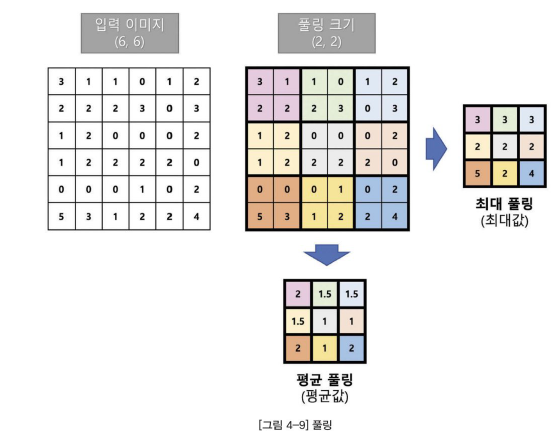

### **02. 간단한 모델 생성**

- mnist 손글씨 데이터셋으로 간단한 구조의 합성곱 신경망 모델 만들기

2-1. 데이터 로드 및 전처리

In [1]:
!pip install --upgrade tensorflow==2.15.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 35.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 39.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.9 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: tensorboard
    Found existing installation

In [2]:
# tensorflow 모듈 import
import tensorflow as tf

- 훈련 셋과 검증 셋으로 구분해서 튜플 형태로 정리하기

In [3]:
# mnist 손글씨 이미지 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


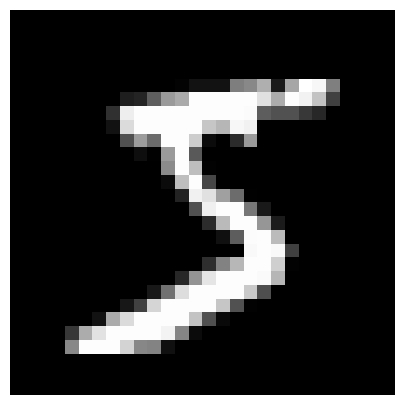

In [4]:
# 샘플 이미지 출력
import matplotlib.pylab as plt

def plot_image(data, idx):
  plt.figure(figsize = (5,5))
  plt.imshow(data[idx], cmap='gray')
  plt.axis('off')
  plt.show()

plot_image(x_train, 0)

In [5]:
print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0 255
0 255


-> 이미지 픽셀이 0~255 범위의 숫자로 구성됨.

In [6]:
# 정규화(Normalization)
x_train = x_train/255.0
x_valid = x_valid/255.0

print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0.0 1.0
0.0 1.0


- mnist 데이터셋: 채널 1개인 모노 컬러 이미지 -> CNN 모델에 주입하기 위해 색상 나타내는 채널 추가

In [7]:
# 채널 추가
print(x_train.shape, x_valid.shape)

x_train_in = x_train[..., tf.newaxis]
x_valid_in = x_valid[..., tf.newaxis]

print(x_train.shape, x_valid.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28) (10000, 28, 28)


2-2. Sequential API로 모델 생성 및 학습
- Sequential API 사용하여 합성곱 레이어 1개, 풀링 레이어 1개를 적용하는 간단한 모델 생성

In [8]:
# Sequential API를 사용해 샘플 모델 생성
model = tf.keras.Sequential([
    # Convolution 적용 (32 filters)
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', # (3,3) 크기의 서로 다른 32가지 종류 커널
                           input_shape=(28, 28, 1), name='conv'),
    # max pooling 적용
    tf.keras.layers.MaxPooling2D((2,2), name='pool'),
    # classifier 출력층
    tf.keras.layers.Flatten(),    # 1차원 배열로 펼쳐준다
    tf.keras.layers.Dense(10, activation = 'softmax')   # 다중 분류 문제
])

- 옵티마이저, 손실함수, 평가지표 설저정한 뒤에 컴파일하여 모델 인스턴스 생성

In [9]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = model.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2271 - accuracy: 0.9353 - val_loss: 0.1001 - val_accuracy: 0.9711
Epoch 2/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0840 - accuracy: 0.9762 - val_loss: 0.0652 - val_accuracy: 0.9777
Epoch 3/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0625 - accuracy: 0.9812 - val_loss: 0.0654 - val_accuracy: 0.9793
Epoch 4/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0514 - accuracy: 0.9847 - val_loss: 0.0622 - val_accuracy: 0.9810
Epoch 5/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0442 - accuracy: 0.9869 - val_loss: 0.0545 - val_accuracy: 0.9826
Epoch 6/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0364 - accuracy: 0.9888 - val_loss: 0.0609 - val_accuracy: 0.9807
Epoch 7/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0310 - accuracy: 0.9908 - val_loss: 0.0544 -

- 모델의 학습된 가중치 사용하여 손실과 평가지표 계산

In [10]:
model.evaluate(x_valid_in, y_valid)

313/313 [==============================] - 1s 4ms/step - loss: 0.0576 - accuracy: 0.9843


[0.057648736983537674, 0.9843000173568726]

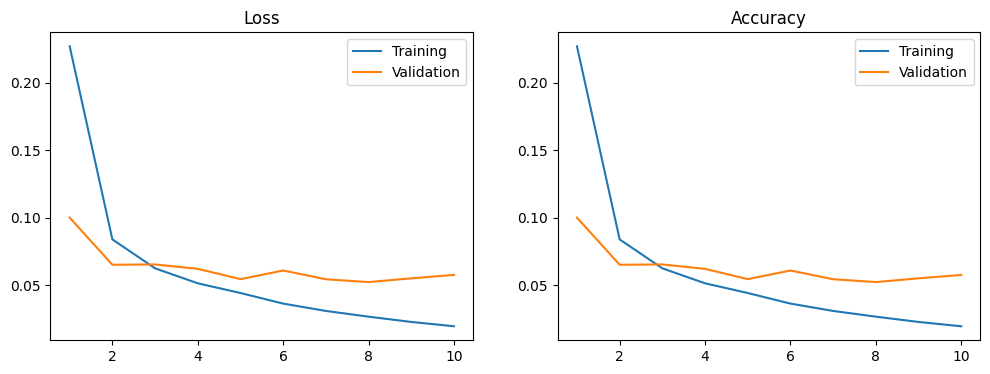

In [11]:
def plot_loss_acc(history, epoch):
  loss, val_loss = history.history['loss'], history.history['val_loss']
  acc, val_acc = history.history['accuracy'], history.history['val_accuracy']

  fig, axes = plt.subplots(1, 2, figsize=(12, 4))

  axes[0].plot(range(1, epoch+1), loss, label = 'Training')
  axes[0].plot(range(1, epoch+1), val_loss, label = 'Validation')
  axes[0].legend(loc='best')
  axes[0].set_title('Loss')

  axes[1].plot(range(1, epoch+1), loss, label = 'Training')
  axes[1].plot(range(1, epoch+1), val_loss, label = 'Validation')
  axes[1].legend(loc = 'best')
  axes[1].set_title('Accuracy')

  plt.show()

plot_loss_acc(history, 10)

-> 검증 셋의 손실은 어느 수준에서 더 이상 낮아지지 않음. 4 epoch 이후부터는 모델이 과대적합으로 진행됨.

2-3. 모델 구조 파악
- (28, 28, 1) 형태의 입력 텐서가 Conv2D 거치면서 (26, 26, 32) 형태로 변환
  - (3,3) 크기의 합성곱 필터 사용해서 이미지 가로, 세로 크기 2씩 줄어듦.
  - 서로 다른 32개의 필터 적용해 특성맵 32개 생성
  - (2,2) 크기의 풀링 레이어 적용해 이미지 크기 1/2로 줄어듦. -> (13, 13, 32) 텐서로 변환
  - Flatten 층에서 3차원 텐서를 2차원 텐서로 펼치면 5408(13x13x32) 원소를 갖는 1차원 벡터가 됨.
  

In [12]:
# 모델 구조
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv (Conv2D)               (None, 26, 26, 32)        320       
                                                                 
 pool (MaxPooling2D)         (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54410 (212.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
# 입력 텐서 형태
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [14]:
# 출력 텐서 형태
model.output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense')>

In [15]:
# 레이어
model.layers

In [16]:
# 첫 번째 레이어 선택
model.layers[0]

In [17]:
# 첫 번째 레이어 입력
model.layers[0].input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [18]:
# 첫 번째 레이어 출력
model.layers[0].output

<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv')>

In [19]:
# 첫 번째 레이어 가중치
model.layers[0].weights

[<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[ 0.48534063,  0.29026628, -0.43865606,  0.08427075,
            0.4746928 , -0.12110487,  0.15954368, -0.24486415,
            0.7530284 , -0.7522963 ,  0.14342727, -1.1852797 ,
           -0.68476325,  0.34538564,  0.3496789 ,  0.07728579,
           -0.67424405,  0.07937787, -0.02034819, -0.05603973,
           -0.5772979 , -0.17861499,  0.17396258,  0.16341667,
            0.17039195,  0.66283584, -0.9476532 ,  0.1130833 ,
           -0.03844737,  0.16152704,  0.33642548, -0.38844627]],
 
         [[-0.23997173,  0.13982864,  0.360994  ,  0.50714666,
           -0.2937932 ,  0.09813676,  0.27148733,  0.06197606,
            0.39423752,  0.09335186,  0.19816993, -0.19160971,
           -0.88280696,  0.06818518,  0.21904886, -0.04958563,
           -0.5371405 ,  0.4251167 ,  0.3110109 ,  0.419947  ,
           -0.7350698 ,  0.19900134,  0.33475745,  0.16820426,
            0.18799739,  0.07795327, -0.02

In [20]:
# 첫 번째 레이어 커널 가중치
model.layers[0].kernel

<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[ 0.48534063,  0.29026628, -0.43865606,  0.08427075,
           0.4746928 , -0.12110487,  0.15954368, -0.24486415,
           0.7530284 , -0.7522963 ,  0.14342727, -1.1852797 ,
          -0.68476325,  0.34538564,  0.3496789 ,  0.07728579,
          -0.67424405,  0.07937787, -0.02034819, -0.05603973,
          -0.5772979 , -0.17861499,  0.17396258,  0.16341667,
           0.17039195,  0.66283584, -0.9476532 ,  0.1130833 ,
          -0.03844737,  0.16152704,  0.33642548, -0.38844627]],

        [[-0.23997173,  0.13982864,  0.360994  ,  0.50714666,
          -0.2937932 ,  0.09813676,  0.27148733,  0.06197606,
           0.39423752,  0.09335186,  0.19816993, -0.19160971,
          -0.88280696,  0.06818518,  0.21904886, -0.04958563,
          -0.5371405 ,  0.4251167 ,  0.3110109 ,  0.419947  ,
          -0.7350698 ,  0.19900134,  0.33475745,  0.16820426,
           0.18799739,  0.07795327, -0.02121967,  0.203570

In [21]:
# 첫 번째 레이어 bias 가중치
model.layers[0].bias

<tf.Variable 'conv/bias:0' shape=(32,) dtype=float32, numpy=
array([-0.49300924, -0.27895603, -0.26705998,  0.08193564, -0.2903102 ,
       -0.34758207, -0.0278    , -0.0804588 ,  0.11819806, -0.29203388,
       -0.27897346, -0.05369939, -0.03136532, -0.23531534, -0.32133883,
       -0.16777952, -0.00904175, -0.01660131, -0.03529799, -0.24467297,
       -0.01529256, -0.10905175, -0.38165504, -0.31346416, -0.24705543,
        0.08670467, -0.15163615, -0.26586652, -0.00488306, -0.12164421,
       -0.23457885, -0.02485084], dtype=float32)>

In [22]:
# 레이어 이름 사용하여 레이어 선택
model.get_layer('conv')

- 모델에 입력 데이터를 넣어주고, 모델의 첫 번째와 두 번째 레이어의 출력을 최종 출력으로 갖는 activator 모델 정의

In [23]:
# 샘플 이미지의 레이어별 출력을 리스트에 추가 (첫 번째, 두 번째 레이어)
activator = tf.keras.Model(inputs = model.input,
                           outputs = [layer.output for layer in model.layers[:2]])
activations = activator.predict(x_train_in[0][tf.newaxis, ...])

len(activations)

1/1 [==============================] - 0s 78ms/step


2

- 2개의 출력 텐서 중에서 첫 번째 텐서는 Conv2D 레이어의 출력

In [24]:
# 첫 번재 레이어 conv의 출력층
conv_activation = activations[0]
conv_activation.shape

(1, 26, 26, 32)

- 첫 번째 레이어에서 출력되는 특성맵 이미지를 32개 커널별로 구분하여 시각화

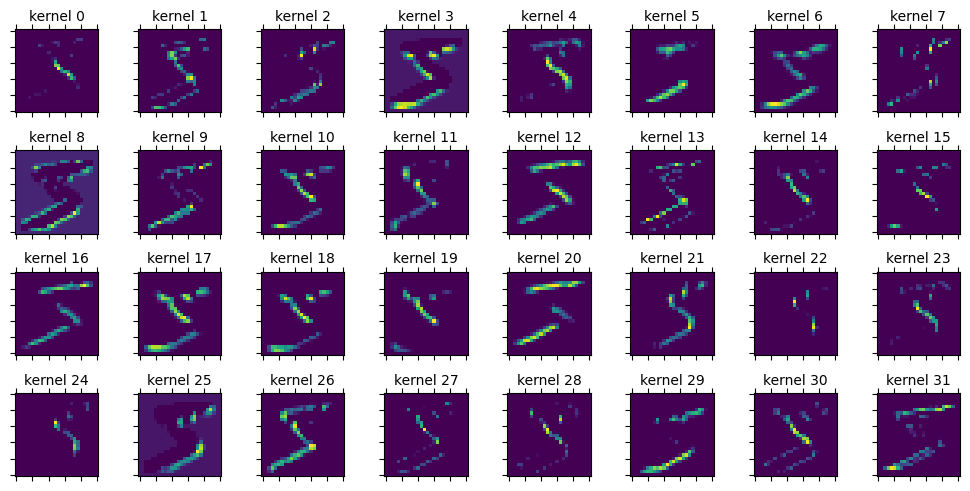

In [25]:
# Convolution 시각화
fig, axes = plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
  axes[i//8, i%8].matshow(conv_activation[0, :, :, i], cmap='viridis')
  axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
  plt.setp(axes[i//8, i%8].get_xticklabels(), visible=False)
  plt.setp(axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

- 두 번째 레이어: 최대 풀링 레이어


In [26]:
# 두번째 레이어 pool 출력층
pooling_activation = activations[1]
print(pooling_activation.shape)

(1, 13, 13, 32)


- 각 커널별로 출력되는 특성맵 이미지 시각화

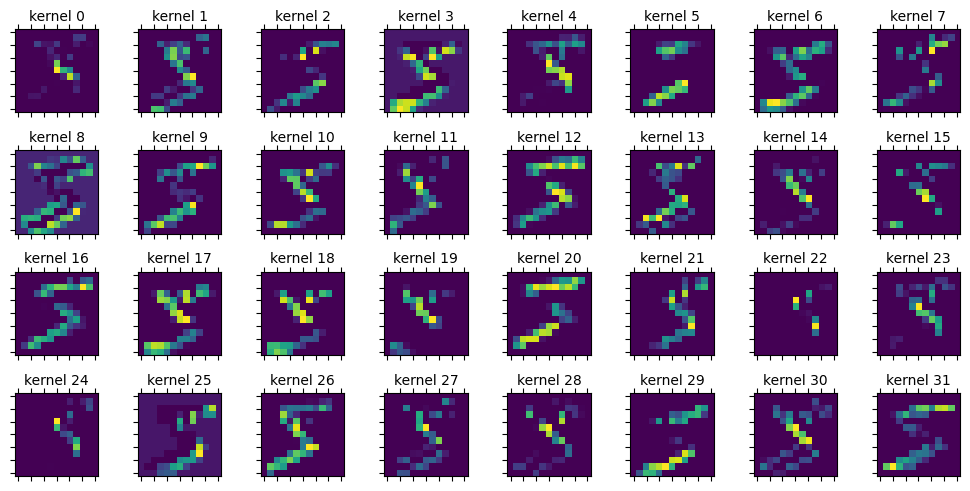

In [27]:
# 시각화
fig, axes = plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
  axes[i//8, i%8].matshow(pooling_activation[0, :, :, i], cmap='viridis')
  axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
  plt.setp(axes[i//8, i%8].get_xticklabels(), visible=False)
  plt.setp(axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

-> onv2D 출력 이미지에 비하여 화소 크기가 굵어짐: 최대 풀링을 사용하면 픽셀 수는 줄이면서 특징을 더욱 강하게 드러낼 수 있음.

### **03. 복잡한 모델 생성**
- 텐서플로 케라스의 Functional API 사용하면, Sequential API로 구현할 수 없는 복잡한 구조의 모델 정의 가능

3-1. 데이터셋 준비


In [28]:
import tensorflow as tf
import numpy as np

In [29]:
#mnist 손글씨 이미지 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


- 원본(0~9까지 숫자를 손글씨로 쓴 이미지(x)와 정답(y)) 정답 외에 홀수인지 짝수인지 판단하는 정답 (y_odd)를 추가

In [30]:
# 새로운 출력 값 배열 생성 (홀수 : 1, 짝수 : 0)
y_train_odd = []
for y in y_train:
  if y%2 == 0:
    y_train_odd.append(0)
  else:
    y_train_odd.append(1)

y_train_odd = np.array(y_train_odd)
y_train_odd.shape

(60000,)

In [31]:
print(y_train[:10])
print(y_train_odd[:10])

[5 0 4 1 9 2 1 3 1 4]
[1 0 0 1 1 0 1 1 1 0]


In [32]:
# Validation 데이터셋 처리
y_valid_odd = []
for y in y_valid:
  if y%2 == 0:
    y_valid_odd.append(0)
  else:
    y_valid_odd.append(1)

y_valid_odd = np.array(y_valid_odd)
y_valid_odd.shape

(10000,)

- 입력 이미지 데이터를 255로 나눠서 정규화
- 모노 컬러 이미지 이므로 새로운 축 추가
- expand_dim() 함수 사용

In [33]:
# 정규화
x_train = x_train/255.0
x_valid = x_valid/255.0

# 채널 추가
x_train_in = tf.expand_dims(x_train, -1)
x_valid_in = tf.expand_dims(x_valid, -1)

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


3-2. Functional API로 다중 입력, 다중 출력 레이어 생성

- 입력 레이어 inputs의 경우, Conv2D 레이어와 Flatten 레이어의 입력으로 사용(2개의 출력) -> 각각 다른 레이어의 입력으로 사용. -> 최종적으로 Concatenate 레이어에서 합쳐져 Dense 레이어 통과

In [34]:
# Functional API 를 사용하여 모델 생성

inputs = tf.keras.layers.Input(shape = (28, 28, 1))

conv = tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu')(inputs)
pool = tf.keras.layers.MaxPooling2D((2,2))(conv)
flat = tf.keras.layers.Flatten()(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
outputs = tf.keras.layers.Dense(10, activation = 'softmax')(concat)

model = tf.keras.models.Model(inputs = inputs, outputs = outputs)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 26, 26, 32)           320       ['input_1[0][0]']             
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)           0         ['conv2d[0][0]']              
 D)                                                                                               
                                                                                                  
 flatten_1 (Flatten)         (None, 5408)                 0         ['max_pooling2d[0][0]'] 

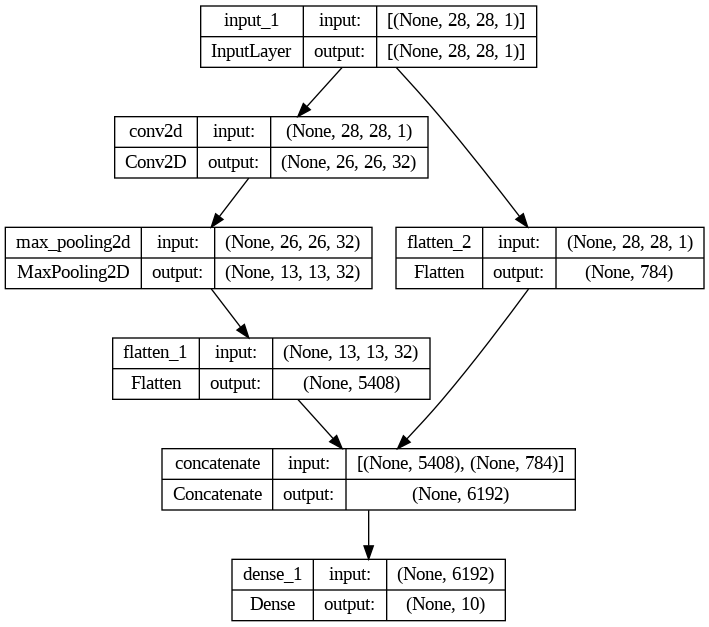

In [36]:
# 모델 구조 출력 및 이미지 파일로 저장
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True, show_layer_names = True, to_file = 'functional_cnn.png')

In [37]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = model.fit(x_train_in, y_train, validation_data=(x_valid, y_valid), epochs=10)

# 모델 성능
val_loss, val_acc = model.evaluate(x_valid_in, y_valid)
print(val_loss, val_acc)

Epoch 1/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.2051 - accuracy: 0.9418 - val_loss: 0.0906 - val_accuracy: 0.9732
Epoch 2/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0791 - accuracy: 0.9765 - val_loss: 0.0684 - val_accuracy: 0.9778
Epoch 3/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0596 - accuracy: 0.9828 - val_loss: 0.0683 - val_accuracy: 0.9790
Epoch 4/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0484 - accuracy: 0.9851 - val_loss: 0.0578 - val_accuracy: 0.9804
Epoch 5/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0400 - accuracy: 0.9879 - val_loss: 0.0680 - val_accuracy: 0.9784
Epoch 6/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0345 - accuracy: 0.9891 - val_loss: 0.0551 - val_accuracy: 0.9838
Epoch 7/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0285 - accuracy: 0.9914 - val_loss: 0.0552 -

3-3. 다중 출력 분류 모델
- 두 가지 서로 다른 분류 문제를 예측하는 다중 출력 모델
  - 0~9까지 숫자를 맞추는 분류 문제와 홀수, 짝수를 맞추는 분류 문제를 동시에 풀어내는 모델 -> 최종 분류기의 출력 레이어를 2개 만드는 것이 핵심

In [38]:
# Functional API를 사용해 모델 생성

inputs = tf.keras.layers.Input(shape = (28, 28, 1), name = 'inputs')

conv = tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', name = 'conv2d_layer')(inputs)
pool = tf.keras.layers.MaxPooling2D((2,2), name = 'maxpool_layer')(conv)
flat = tf.keras.layers.Flatten(name = 'flatten_layer')(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
digit_outputs = tf.keras.layers.Dense(10, activation = 'softmax', name = 'digit_dense')(concat)

odd_outputs = tf.keras.layers.Dense(1, activation = 'sigmoid', name = 'odd_dense')(flat_inputs)

model = tf.keras.models.Model(inputs = inputs, outputs = [digit_outputs, odd_outputs])

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 inputs (InputLayer)         [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d_layer (Conv2D)       (None, 26, 26, 32)           320       ['inputs[0][0]']              
                                                                                                  
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)           0         ['conv2d_layer[0][0]']        
 D)                                                                                               
                                                                                                  
 flatten_layer (Flatten)     (None, 5408)                 0         ['maxpool_layer[0][0]'] 

In [39]:
# 모델의 입력과 출력을 나타내는 텐서
print(model.input)
print(model.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='inputs'), name='inputs', description="created by layer 'inputs'")
[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'digit_dense')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'odd_dense')>]


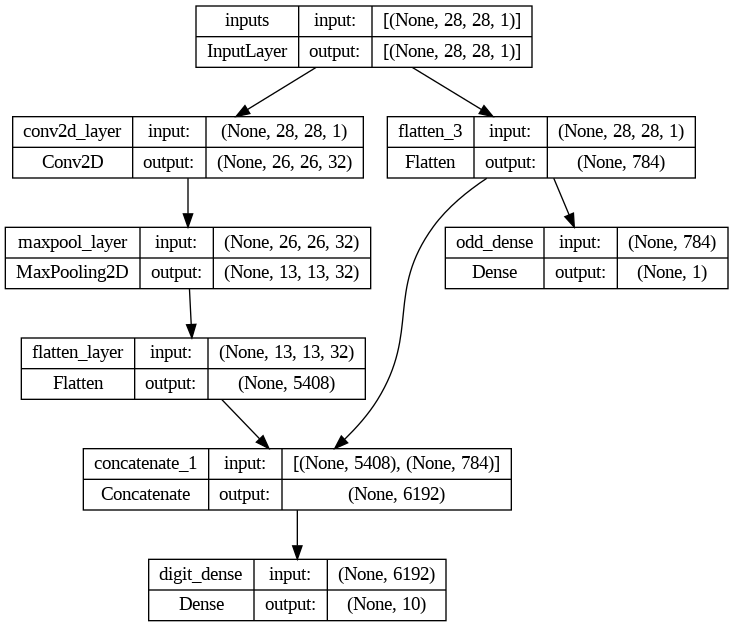

In [40]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, to_file='multi_output_cnn.png')

- 모델 정의할 때 각각의 출력 Dense 레이어에 name 속성으로 지정한 이름을 key로 하고, 해당 key에 해당하는 레이어에 적용할 손실함수와 가중치를 딕셔너리 형태로 지정
- fit() 메소드 적용할 때도 출력 값 2개 지정.
- 레이어 이름 속성을 key로 하는 딕셔너리 형태로 각각의 출력에 맞는 정답 배열을 입력

In [41]:
# 모델 컴파일
model.compile(optimizer='adam',
              loss={'digit_dense': 'sparse_categorical_crossentropy',
                    'odd_dense':'binary_crossentropy'},
              loss_weights={'digit_dense':1, 'odd_dense':0.5},
              # loss = 1.0 * sparse_categorical_crossentropy + 0.5 * binary_crossentropy
              metrics=['accuracy'])

# 모델 훈련
history = model.fit({'inputs':x_train_in},
                  {'digit_dense':y_train, 'odd_dense':y_train_odd},
                   validation_data=({'inputs':x_valid_in}, {'digit_dense':y_valid, 'odd_dense':y_valid_odd}), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.3689 - digit_dense_loss: 0.2059 - odd_dense_loss: 0.3260 - digit_dense_accuracy: 0.9415 - odd_dense_accuracy: 0.8633 - val_loss: 0.2246 - val_digit_dense_loss: 0.0865 - val_odd_dense_loss: 0.2761 - val_digit_dense_accuracy: 0.9739 - val_odd_dense_accuracy: 0.8877
Epoch 2/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2143 - digit_dense_loss: 0.0784 - odd_dense_loss: 0.2719 - digit_dense_accuracy: 0.9770 - odd_dense_accuracy: 0.8909 - val_loss: 0.1954 - val_digit_dense_loss: 0.0633 - val_odd_dense_loss: 0.2641 - val_digit_dense_accuracy: 0.9799 - val_odd_dense_accuracy: 0.8970
Epoch 3/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1909 - digit_dense_loss: 0.0594 - odd_dense_loss: 0.2629 - digit_dense_accuracy: 0.9823 - odd_dense_accuracy: 0.8962 - val_loss: 0.1892 - val_digit_dense_loss: 0.0567 - val_odd_dense_loss: 0.2649 - val_digit_dense_accuracy: 0.9804 -

In [42]:
# 모델 성능
model.evaluate({'inputs':x_valid_in}, {'digit_dense':y_valid, 'odd_dense':y_valid_odd})

313/313 [==============================] - 1s 4ms/step - loss: 0.1888 - digit_dense_loss: 0.0613 - odd_dense_loss: 0.2551 - digit_dense_accuracy: 0.9829 - odd_dense_accuracy: 0.9012


[0.18884825706481934,
 0.06130535155534744,
 0.255085825920105,
 0.9829000234603882,
 0.901199996471405]

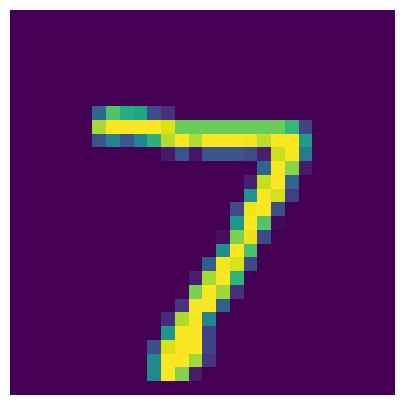

In [43]:
# 샘플 이미지 출력
## 숫자 7에 대한 손글씨 이미지(검증 데이터셋 인덱스 0에 해당하는 이미지)
import matplotlib.pylab as plt

def plot_image(data, idx):
  plt.figure(figsize=(5,5))
  plt.imshow(data[idx])
  plt.axis('off')
  plt.show()

plot_image(x_valid, 0)

- 검증 데이터셋의 모든 이미지 데이터 입력해 2개의 분류 문제에 대한 예측 확률 구하기
  - 첫 번째 예측 값: 10개 분류 레이블에 대한 확률
  - 두 번째 예측 값: 홀수일 확률

In [44]:
digit_preds, odd_preds = model.predict(x_valid_in)
print(digit_preds[0])
print(odd_preds[0])

313/313 [==============================] - 1s 4ms/step
[5.7389836e-14 1.9877332e-10 1.7427804e-09 2.8235053e-07 1.7589517e-11
 6.2387080e-13 1.2216698e-21 9.9999970e-01 4.9502974e-10 7.9312046e-10]
[0.9994542]


In [45]:
digit_labels = np.argmax(digit_preds, axis=1)
digit_labels[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

- 홀수, 짝수 여부에 대한 예측 레이블 출력
  - 임계값으로 0.5 지정
  - 홀수일 확률이 0.5보다 클 경우 홀수로 분류

In [46]:
odd_labels = (odd_preds>0.5).astype(np.int64).reshape(1, -1)[0]
odd_labels[0:10]

array([1, 0, 1, 0, 0, 1, 0, 1, 0, 1])

3-4. 전이 학습
- 전이학습(Transfer Learning): 앞서 훈련한 모델의 일부를 가져와서 그대로 사용하고, 최종 출력층만 새롭게 추가하여 모델 재구성하는 것, 기존에 학습된 모델 활용해 새로운 모델 만들어 내는 개념
  - 입력 레이어부터 'flatten_layer'라는 name 속성 갖는 Flatten 층까지 해당하는 부분 따로 추출하여 base_model 객체 만들기

In [47]:
# 앞의 모델에서 flatten_layer 출력을 추출
base_model_output = model.get_layer('flatten_layer').output

# 앞의 출력을 출력으로 하는 모델 정의
base_model = tf.keras.Model(inputs = model.input, outputs = base_model_output, name = 'base')
base_model.summary()

Model: "base"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 320 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


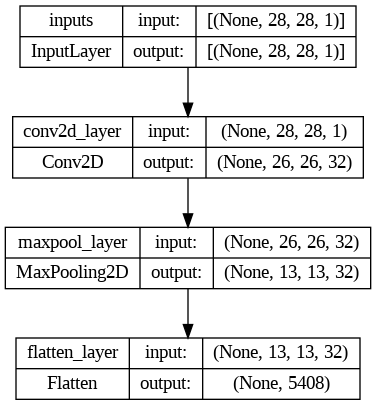

In [48]:
tf.keras.utils.plot_model(base_model, show_shapes=True, show_layer_names=True, to_file='base_model.png')

- basem_model을 레이어로 추가하고, 최종 분류기 역할을 하는 Dense 레이어를 새롭게 이어서 추가해주기

In [49]:
# Sequential API 적용
digit_model = tf.keras.Sequential([
    base_model, tf.keras.layers.Dense(10, activation='softmax')
])
digit_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 base (Functional)           (None, 5408)              320       
                                                                 
 dense_2 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54410 (212.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


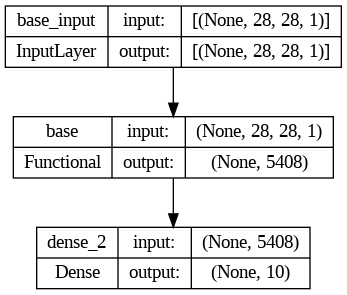

In [50]:
tf.keras.utils.plot_model(digit_model, show_shapes=True, show_layer_names=True, to_file='digit_model.png')

In [51]:
# 모델 컴파일
digit_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1282 - accuracy: 0.9648 - val_loss: 0.0674 - val_accuracy: 0.9780
Epoch 2/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0591 - accuracy: 0.9824 - val_loss: 0.0555 - val_accuracy: 0.9808
Epoch 3/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0444 - accuracy: 0.9861 - val_loss: 0.0589 - val_accuracy: 0.9805
Epoch 4/10
1875/1875 [==============================] - 23s 13ms/step - loss: 0.0354 - accuracy: 0.9892 - val_loss: 0.0520 - val_accuracy: 0.9842
Epoch 5/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0296 - accuracy: 0.9907 - val_loss: 0.0538 - val_accuracy: 0.9829
Epoch 6/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0242 - accuracy: 0.9924 - val_loss: 0.0538 - val_accuracy: 0.9850
Epoch 7/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0203 - accuracy: 0.9937 - val_loss: 0.0511 -

- 모델 인스턴스는 trainable 속성을 가지고 있음 -> 이 속성을 False로 지정하면 모델의 파라미터 값이 고정되어 훈련을 통해 업데이트 되지 않음.

In [52]:
# 베이스 모델의 가중치 고정(Freeze Model)

base_model_frozen = tf.keras.models.Model(inputs = model.input, outputs = base_model_output, name = 'base_frozen')
base_model_frozen.trainable = False
base_model_frozen.summary()

Model: "base_frozen"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 320 (1.25 KB)
_________________________________________________________________


- 파라미터 고정한 base_model_input 모델과 새로운 분류기 역할을 하는 Dense 레이어를 Functional API 적용하여 구성

In [53]:
# Functional API 적용
dense_output = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen.output)
digit_model_frozen = tf.keras.models.Model(inputs = base_model_frozen.input, outputs = dense_output)
digit_model_frozen.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54090 (211.29 KB)
Non-trainable params: 320 (1.25 KB)
_____________________

-> 훈련 가능한 파라미터는 Flatten 레이어의 출력 5408개와 Dense 레이어의 10개 노드 사이의 가중치만 해당함. : Conv2D 레이어의 파라미터 320개는 포함 X

In [54]:
# 모델 컴파일
digit_model_frozen.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model_frozen.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1144 - accuracy: 0.9689 - val_loss: 0.0575 - val_accuracy: 0.9821
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0508 - accuracy: 0.9842 - val_loss: 0.0526 - val_accuracy: 0.9824
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0362 - accuracy: 0.9891 - val_loss: 0.0481 - val_accuracy: 0.9845
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0288 - accuracy: 0.9911 - val_loss: 0.0518 - val_accuracy: 0.9842
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0230 - accuracy: 0.9929 - val_loss: 0.0523 - val_accuracy: 0.9845
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0186 - accuracy: 0.9941 - val_loss: 0.0613 - val_accuracy: 0.9817
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0157 - accuracy: 0.9952 - val_loss: 0.0552 - val_ac

In [55]:
# 베이스 모델의 Conv2D 레이어의 가중치만 고정(Freeze Layer)

base_model_frozen2 = tf.keras.models.Model(inputs = model.input, outputs = base_model_output, name = 'base_frozen2')
base_model_frozen2.get_layer('conv2d_layer').trainable=False
base_model_frozen2.summary()

Model: "base_frozen2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 320 (1.25 KB)
_________________________________________________________________


- 고정한 모델에 새로운 분류기 역할을 하는 Dense 레이어 연결하여 모델 구성

In [56]:
# Functional API 적용
dense_output2 = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen2.output)
digit_model_frozen2 = tf.keras.models.Model(inputs = base_model_frozen2.input, outputs = dense_output2)
digit_model_frozen2.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54090 (211.29 KB)
Non-trainable params: 320 (1.25 KB)
_____________________

In [57]:
# 모델 컴파일
digit_model_frozen2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model_frozen2.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1130 - accuracy: 0.9696 - val_loss: 0.0561 - val_accuracy: 0.9832
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0489 - accuracy: 0.9855 - val_loss: 0.0530 - val_accuracy: 0.9832
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0361 - accuracy: 0.9890 - val_loss: 0.0462 - val_accuracy: 0.9854
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0282 - accuracy: 0.9916 - val_loss: 0.0479 - val_accuracy: 0.9835
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0227 - accuracy: 0.9930 - val_loss: 0.0516 - val_accuracy: 0.9841
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0186 - accuracy: 0.9946 - val_loss: 0.0503 - val_accuracy: 0.9848
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0153 - accuracy: 0.9953 - val_loss: 0.0548 - val_ac